# Project Description

E-commerce is one of the booming industries & is a one-stop destination for various sellers to market & sell their products online to attract a larger market. Given a set of customer reviews of each category (camera, battery, display, value for money, performance) for a mobile that is live on an e-commerce platform like (Flipkart/Amazon. etc)

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [139]:
tdf = pd.read_csv('/content/Flipkart_Amazon Mobile Reviews.csv')
tdf.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [140]:
df= tdf
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [141]:
del df['Unnamed: 0']
df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# Target - Rating Scale

In [142]:
df['rating'].isnull().sum()

0

In [143]:
df['rating'].value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

In [144]:
# we definately do not see a balanced data set.
# the the values of 2 ratings are very low.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


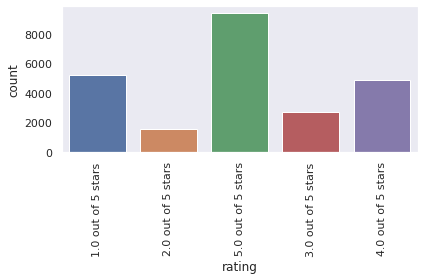

In [145]:
from matplotlib.pyplot import xticks

plt.Figure( figsize =(8,6) )
sns.countplot(df['rating'])
xticks(rotation= 90)

plt.tight_layout()
plt.show()


we clearly see an imbalanced data set.

In [146]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [147]:
rate = {'1.0 out of 5 stars':1, '2.0 out of 5 stars':2, '5.0 out of 5 stars':5,
       '3.0 out of 5 stars':3, '4.0 out of 5 stars':4}
df['rating'].replace(rate,inplace=True)
df['rating'].head()

0    1
1    2
2    5
3    3
4    1
Name: rating, dtype: int64

# Review-Title

In [148]:
df['Review-Title'].isnull().sum()

2

In [149]:
df = df.dropna(subset=['Review-Title'])

In [150]:
df['Review-Title'].isnull().sum()

0

Lematizing the Review Title feature

In [151]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') 

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Review-Title'] = df['Review-Title'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Stopwords removal

In [152]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Review-Title'] = [remove_stopwords(r) for r in df['Review-Title']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
df['Review-Title'] = df['Review-Title'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df['Review-Title'] = df['Review-Title'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df['Review-Title'].head()

0               Worst phone ever
1                       Not mark
2                   Awesome look
3    One plus losing originality
4                           Read
Name: Review-Title, dtype: object

In [156]:
df['Review-Title'] = [review.lower() for review in df['Review-Title']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
df['Review-Title'].head()

0               worst phone ever
1                       not mark
2                   awesome look
3    one plus losing originality
4                           read
Name: Review-Title, dtype: object

all process for the first feature is compleate.

In [158]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

# 'Review-Body'

In [159]:
df['Review-Body'].isnull().sum()

616

Imputing nan walues with title names.

In [160]:
try:
  for i in range(len(df['Review-Body'])):
    if type(df['Review-Body'][i]) == float:
      df.iloc[i,2] = df.iloc[i,0]
except:
  None

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [161]:
df['Review-Body'].isnull().sum()

391

half the value is imputed and half is not so we will drop the not imputed rows.

In [162]:
df = df.dropna(subset=['Review-Body'])

In [163]:
df['Review-Body'].isnull().sum()

0

In [164]:
# its clear now...

In [165]:
df['Review-Body'] = df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [166]:
df['Review-Body'] = df['Review-Body'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [167]:
df['Review-Body'] = [review.lower() for review in df['Review-Body']]

In [168]:
df.head()

,Review-Title,rating,Review-Body,Product Name
0,worst phone ever,1,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,not mark,2,writing this review after using 3days honest t...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,awesome look,5,camera good very fast phone back look awesomew...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,one plus losing originality,3,the media could not loaded average product dec...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,read,1,got delivery feb when unboxed the phone the di...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [169]:
# lemmatizing

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') 

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Review-Body'] = df['Review-Body'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stopwords

In [170]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Review-Body'] = [remove_stopwords(r) for r in df['Review-Body']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 'Product Name'

In [171]:
df['Product Name'].isnull().sum()

0

In [172]:
df['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4450
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4324
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3597
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2642
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2100
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1365
Samsung Galaxy M32                                            1336
Name: Product Name, dtype: int64

In [173]:
df = df[df['Product Name'] != 'Samsung Galaxy M32']

In [174]:
df['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4450
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4324
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3597
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2642
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2100
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1365
Name: Product Name, dtype: int64

In [175]:
df['RAM'] = df['Product Name']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'Product Name', 'RAM'], dtype='object')

## RAM

In [177]:
df.reset_index(inplace = True,drop = True)

In [178]:
for row in range(len(df['RAM'])):
  for i in range(len(df['RAM'][row])):
    if not i > len(df['RAM'][row]):
      if df['RAM'][row][i] == 'R' and df['RAM'][row][i+1] == 'A' and df['RAM'][row][i+2] == 'M':
        df['RAM'][row] = df['RAM'][row][i-4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [179]:
df['RAM'].unique()

array(['8', '6', '4'], dtype=object)

In [180]:
df = pd.get_dummies(df,columns = ['RAM'])

## Storage

In [181]:
df['Storage'] = df['Product Name']

In [182]:
for row in range(len(df['Storage'])):
  df['Storage'][row] = list (df['Storage'][row].split(' '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
for row in range(len(df['Storage'])):
  for i in range(len(df['Storage'][row])):
    if not i > len(df['Storage'][row]):
      if (df['Storage'][row][i].lower() == 'storage)') or (df['Storage'][row][i].lower() == 'rom'):
        if len(df['Storage'][row][i-1]) < 3:
          df['Storage'][row] = df['Storage'][row][i-2] + df['Storage'][row][i-1]
        else:
          df['Storage'][row] = df['Storage'][row][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
df['Storage'].unique()

array(['128GB', '64GB'], dtype=object)

In [185]:
df = pd.get_dummies(df,columns=['Storage'])

## Productname clean

In [186]:
df['product'] = df['Product Name']

In [187]:
for rows in range(len(df['Product Name'])):
  for i in range(len(df['Product Name'][rows])):
    if not i > len(df['Product Name'][row]):
      if df['Product Name'][rows][i] == '(':
        df['product'][rows] = str(df['Product Name'][rows][:i-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [188]:
del df['Product Name']

In [189]:
df['product'].unique()

array(['OnePlus Nord CE 2 5G', 'OPPO A31', 'realme narzo 50A',
       'Redmi 10 Prime', 'Redmi 9 Activ', 'Redmi Note 11',
       'vivo iQOO Z6 5G'], dtype=object)

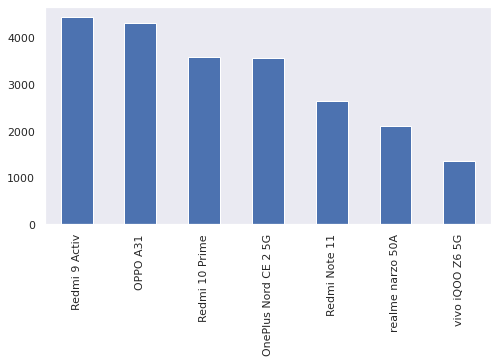

In [190]:
plt.figure(figsize=(8,4))
df['product'].value_counts().plot.bar()

In [191]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'RAM_4', 'RAM_6', 'RAM_8',
       'Storage_128GB', 'Storage_64GB', 'product'],
      dtype='object')

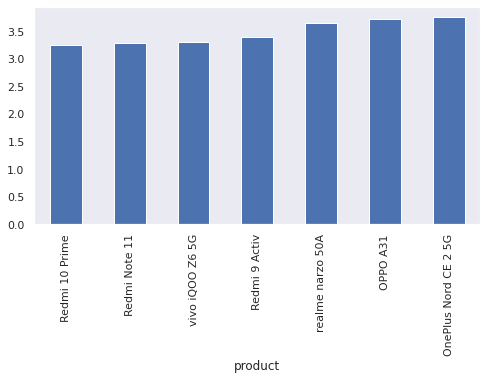

In [192]:
plt.figure(figsize=(8,4))
df.groupby(['product'])['rating'].mean().sort_values().plot(kind='bar')

In [193]:
# we will do one hot encoding as this is a classification problem
# lable will set an order to the mobile phones which we dont want to do with imbalanced dataset.

In [194]:
prod = df['product']

In [195]:
del df['product']

In [196]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'RAM_4', 'RAM_6', 'RAM_8',
       'Storage_128GB', 'Storage_64GB'],
      dtype='object')

# Checking the Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


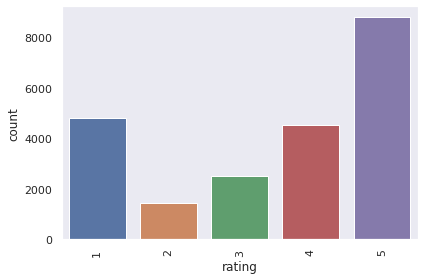

In [197]:
plt.Figure( figsize =(8,6) )
sns.countplot(df['rating'])
xticks(rotation= 90)

plt.tight_layout()
plt.show()

# Merging and deleting

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [199]:
l = []
l.append('Review-Title')
l.append('Review-Body')

lru = list(df['rating'].unique())
lru

[1, 2, 5, 3, 4]

In [200]:
cdf = df.copy(deep=True)
#df = cdf.copy(deep=True)

In [63]:
df['rating1'] = df['rating']
df.drop(df['rating'],inplace = True)

In [64]:
for i in range(len(l)):
  for j in range(len(lru)):
    tfidf = TfidfVectorizer(max_features = 500)
    tempdf = df[df['rating1']==lru[j]]

    t = tfidf.fit_transform(tempdf[l[i]])
    
    ind = list(df[df['rating1']==lru[j]].index)

    feature_names = tfidf.get_feature_names()
    
    redf = pd.DataFrame(t.toarray(), columns = feature_names)
    redf.set_index(pd.Index(ind), inplace=True)
    df = df.merge(redf,how = 'outer',left_index=True,right_index=True)
  del df[l[i]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cost_x', 'normal_x', 'ram_x', 'missing_x', 'per_x', 'feel_x', 'expect_x', 'service_x', 'performance_x', 'budget_x', 'lot_x', 'say_x', 'handset_x', 'deliver_x', 'photo_x', 'sensor_x', 'result_x', 'smartphone_x', 'satisfy_x', 'this_x', 'feature_x', 'find_x', 'screen_x', 'think_x', 'oppo_x', 'back_x', 'work_x', 'old_x', 'battery_x', 'compare_x', 'camera_x', 'less_x', 'phone_x', 'speed_x', 'well_x', 'happy_x', 'average_x', 'speaker_x', 'experience_x', 'best_x', 'look_x', 'backup_x', 'get_x', 'card_x', 'one_x', 'brand_x', 'most_x', 'network_x', 'nhi_x', 'price_x', 'great_x', 'camara_

In [65]:
df['rating1']

0        1
6        5
7        3
8        1
9        5
        ..
22043    4
22044    4
22045    5
22046    1
22047    4
Name: rating1, Length: 22043, dtype: int64

In [66]:
df.fillna(0,inplace = True)

In [67]:
df.isnull().sum()

rating_x         0
RAM_4            0
RAM_6            0
RAM_8            0
Storage_128GB    0
                ..
xiaomi_y         0
year             0
yet              0
youtube          0
zoom_y           0
Length: 5007, dtype: int64

# spliting and scaling the data.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
x = df.drop(columns=['rating1'])
y = df['rating1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
x_train.head()

,rating_x,RAM_4,RAM_6,RAM_8,Storage_128GB,Storage_64GB,100_x,10k_x,25k_x,3rd_x,...,work_y,worst,worth_y,would_y,write,xiaomi_y,year,yet,youtube,zoom_y
17281,5,1,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18593,1,1,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20080,5,1,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20285,5,1,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3395,1,0,0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Balanced learning.

In [71]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)
x_dsmt, y_dsmt = x_smt, y_smt # for decition tree
x_rsmt, y_rsmt = x_smt, y_smt # for randomforest
x_xsmt, y_xsmt = x_smt, y_smt # for Xgboost

# Knn model

In [72]:
# p = []
# for i in range(1,20): 
#   for j in range(4,10): 
#     p.append((str(i)+str(j)))

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

score = -70
l = 0
for i in range(1,15): # best K_value
    # print(round(((p.index(str(i)+str(j)))/114)*100))
    knn = KNeighborsClassifier(i)
    knn.fit(x_smt,y_smt)
    s = np.mean(cross_val_score(knn, x_smt, y_smt, cv=9)) # mean cv_score
    t = knn.score(x_test,y_test)
    if s > score and t > s: # condition to block overfit.
      score = s
      l = i

In [74]:
print('The best score obtained = ',score.round(2))
print('The best Nearest Neighbors =',l)#,'\nThe best cross validation fold =',c)

The best score obtained =  1.0
The best Nearest Neighbors = 4


In [75]:
knn = KNeighborsClassifier(l)
knn.fit(x_smt,y_smt)

KNeighborsClassifier(n_neighbors=4)

In [76]:
y_pred = knn.predict(x_test)

Confusion matrix:
 [[1240    0    0    0    0]
 [   0  333    0    0    0]
 [   0    0  657    0    0]
 [   0    0    0 1139    0]
 [   0    0    0    0 2142]]


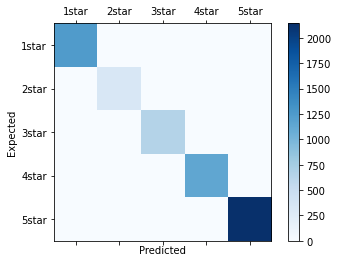

In [77]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Decision Tree Model

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
score = -80
l = 0
for i in range(1,15):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_dsmt, y_dsmt)
    s = np.mean(cross_val_score(dt, x_dsmt, y_dsmt, cv=9)) # mean cv_score
    t = dt.score(x_test, y_test)
    if s > score and t > s:# condition to block overfit.
      score = s
      l = i

In [79]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.93
The best depth = 3


In [80]:
dt = DecisionTreeClassifier(max_depth=l)
dt.fit(x_dsmt, y_dsmt)

DecisionTreeClassifier(max_depth=3)

In [81]:
y_pred = dt.predict(x_test)

Confusion matrix:
 [[1240    0    0    0    0]
 [   0  333    0    0    0]
 [   0    0  657    0    0]
 [   0    0    0 1139    0]
 [   0    0    0    0 2142]]


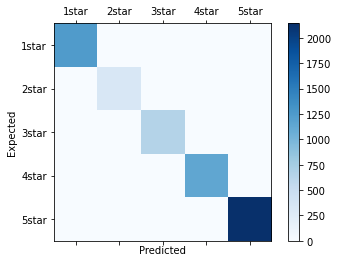

In [82]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Random forest model

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
score=-80
for i in range(1,15):
  rf = RandomForestClassifier(n_estimators= 100, max_depth = i, max_features='sqrt')
  rf.fit(x_rsmt, y_rsmt)
  s = np.mean(cross_val_score(rf, x_rsmt, y_rsmt, cv=9)) # mean cv_score
  t = rf.score(x_test, y_test)
  if s > score and t > s:# condition to block overfit.
    score = s
    l = i

In [84]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.99
The best depth = 14


In [85]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = l, max_features='sqrt')
rf.fit(x_rsmt, y_rsmt)

RandomForestClassifier(max_depth=14, max_features='sqrt')

In [86]:
y_pred = rf.predict(x_test)

Confusion matrix:
 [[1240    0    0    0    0]
 [   0  312    0    0   21]
 [   0    0  603    0   54]
 [   0    0    0 1055   84]
 [   0    0    0    0 2142]]


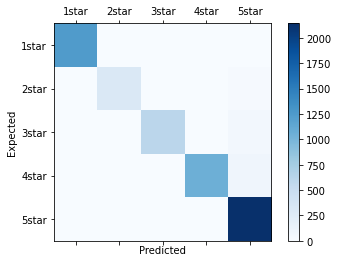

In [87]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Business Insights.

Since the data is NLP oriented we dont have much features to gather insights on.
but we can definately throw light on certain factors as seen below.

we were also asked to answer certain questions lets look at them.

1) Categorize & analyse the reviews to calculate 
the percentage of positive & negative reviews.

2) Calculate the total rating on a scale of 5 
for each category.

3) Create a Ranking table for each Mobile phone
based on each category and overall ranking.

In [ ]:
# Categorize & analyse the reviews to calculate the percentage of positive & negative reviews.
# for this we already have the ratings feature.
# we will also plot word clouds for the key features.

In [66]:
positivedf = df[df['rating'] > 3]
negativedf = df[df['rating'] <= 3]

In [68]:
# % of positive and negative reviews....
df.shape

(22043, 9)

In [75]:
positivepercent = positivedf['Review-Body'].count() / df['Review-Body'].count() * 100
negativepercent = negativedf['Review-Body'].count() / df['Review-Body'].count() * 100
print('positivepercent = ',positivepercent.round(2))
print('negativepercent = ',negativepercent.round(2))

positivepercent =  60.43
negativepercent =  39.57


In [268]:
df['sentiment'] = df['rating']

In [269]:
a = {1:0,2:0,3:0,4:1,5:1}
df['sentiment'].replace(a,inplace = True)

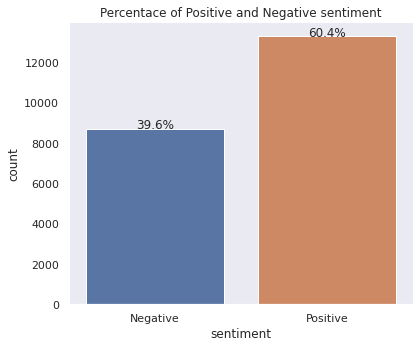

In [131]:
percentage = [negativepercent, positivepercent]

plt.figure(figsize=(6,5))
plt.title('Percentace of Positive and Negative sentiment')
ax = sns.countplot(data=df, x='sentiment')
xlab = ['Negative','Positive']
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
sns.despine()
ax.set(xticklabels = xlab)

plt.tight_layout()
plt.show()

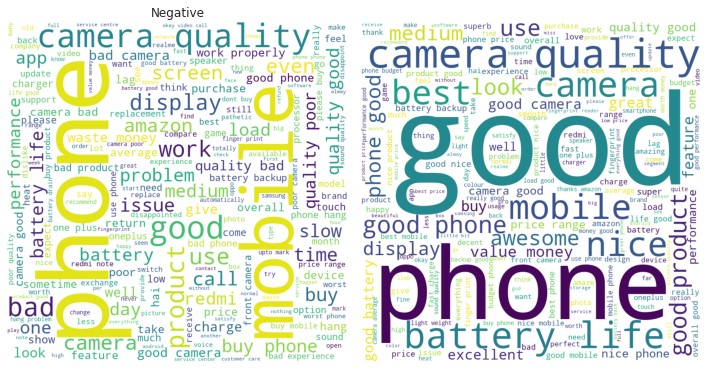

In [136]:
d = list(df['sentiment'].unique())
plt.figure(figsize = (10, 10), facecolor = None) 
for i in range(len(d)):
  from wordcloud import WordCloud
  word_cloud_df = df.loc[df['sentiment'] == d[i],:]
  all_words = ' '.join([text for text in word_cloud_df['Review-Body']])
  

  wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 10).generate(all_words)

  #plot the WordCloud image                        
  names = ['Negative','Positive']
  plt.title(names[i-1])
  plt.subplot(1,2,i+1)
  plt.imshow(wordcloud) 
  plt.axis("off") 
plt.tight_layout() 
plt.show()

2. Calculate the total rating on a scale of 5 for each category.

In [201]:
df['product']=prod 

In [ ]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'RAM_4', 'RAM_6', 'RAM_8',
       'Storage_128GB', 'Storage_64GB', 'product'],
      dtype='object')

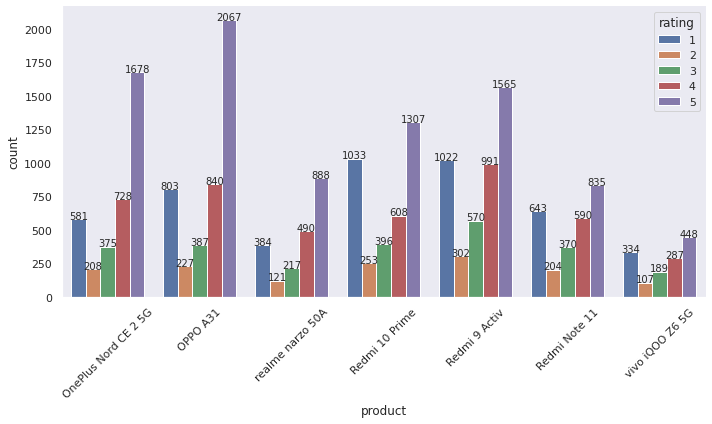

In [226]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x= 'product',hue='rating')
plt.xticks(rotation = 45)

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   ax.annotate((patches[i].get_height().round(0)), (x, y), ha='center')

sns.despine()
plt.tight_layout() 
plt.show()

3. Create a Ranking table for each Mobile phone based on each category and overall ranking.

In [275]:
del df['rank']

In [276]:
newdf = df[df['sentiment']==1]

In [278]:
newdf['rank'] = newdf['sentiment'].rank()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [271]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'RAM_4', 'RAM_6', 'RAM_8',
       'Storage_128GB', 'Storage_64GB', 'product', 'rank', 'sentiment'],
      dtype='object')

Text(0, 0.5, 'Product Name and Rank Based on User Rating')

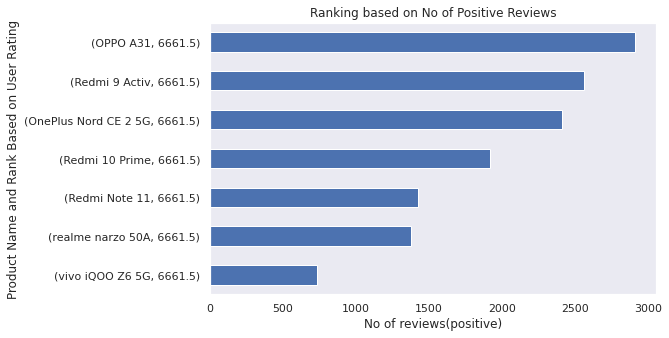

In [291]:
plt.figure(figsize=(8,5))
newdf.groupby(df['product'])['rank'].value_counts().sort_values().plot.barh()
plt.title('Ranking based on No of Positive Reviews')
plt.xlabel('No of reviews(positive)')
plt.ylabel('Product Name and Rank Based on User Rating')